In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rafibayer","key":"07213c0f3c930d9aa1490469eb5ebc54"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# KAGGLE API COMMAND
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 339M/344M [00:02<00:00, 155MB/s]
100% 344M/344M [00:02<00:00, 166MB/s]


In [0]:
from zipfile import ZipFile
filename = "/content/intel-image-classification.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
from zipfile import ZipFile
filename = "/content/seg_train.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
import cv2
import os

!mkdir images
for folders in os.listdir("seg_train"):
  for files in os.listdir("seg_train/{}".format(folders)):
    os.rename("seg_train/{}/{}".format(folders, files), "images/{}{}".format(folders, files))
    


In [0]:
from keras.preprocessing.image import img_to_array, load_img
from skimage.color import lab2rgb, rgb2lab



import numpy as np
x_train = []
y_train = []

BW_SHAPE = (256, 256)
COL_SHAPE = (256, 256, 2)

MAX_TRAINING_IMAGES = 7000
img_pathes = os.listdir("images")[:MAX_TRAINING_IMAGES]


for img in img_pathes:
  image = img_to_array(load_img("images/" + img, target_size=BW_SHAPE)) / 255
  lab_image = rgb2lab(image)
  lab_image = (lab_image + [0, 128, 128]) / [100, 255, 255]

  bw = lab_image[:,:,0]
  col = lab_image[:,:,1:]
  
  
  x_train.append(bw)
  y_train.append(col)
  
  
x_train = np.array(x_train)
y_train = np.array(y_train)

Using TensorFlow backend.


In [0]:
x_train = np.expand_dims(x_train, 3)
print(x_train.shape)
print(y_train.shape)

(7000, 256, 256, 1)
(7000, 256, 256, 2)


In [0]:
# tf imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, UpSampling2D

In [0]:
model = Sequential()

model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))

model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(Conv2D(16, (3,3), padding='same', activation='relu'))


model.add(Conv2D(2, (3,3), padding='same', activation='tanh'))

model.compile(optimizer='adam', loss='mse')
model.summary()

W0814 01:45:12.292116 139953028188032 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 16)      9

In [0]:
model.fit(x_train, y_train, batch_size=128, epochs = 6, shuffle=True)

Epoch 1/6
7000/7000 [==============================] - 122s 17ms/sample - loss: 0.0028
Epoch 2/6
7000/7000 [==============================] - 123s 18ms/sample - loss: 0.0027
Epoch 3/6
7000/7000 [==============================] - 123s 18ms/sample - loss: 0.0026
Epoch 4/6
7000/7000 [==============================] - 123s 18ms/sample - loss: 0.0025
Epoch 5/6
7000/7000 [==============================] - 123s 18ms/sample - loss: 0.0025
Epoch 6/6
7000/7000 [==============================] - 123s 18ms/sample - loss: 0.0025


In [0]:
model.save_weights("model.h5")

In [0]:
model.load_weights("model.h5")

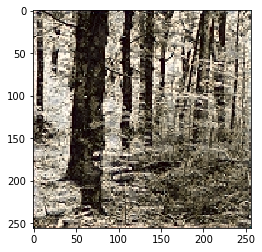

In [0]:
import matplotlib.pyplot as plt

out = np.zeros((256, 256, 3))

i = 8

pred = model.predict(x_train[i:i+1])
out[:,:,0] = x_train[i][:,:,0]
out[:,:,1:] = pred[0]

out = (out * [100, 255, 255]) - [0, 128, 128]
out = lab2rgb(out)

plt.imshow(out)

In [0]:
from google.colab import files
files.upload()

Saving rainier_large.jpg to rainier_large.jpg


{'rainier_large.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xed\x00,Photoshop 3.0\x008BIM\x04%\x00\x00\x00\x00\x00\x10\xd4\x1d\x8c\xd9\x8f\x00\xb2\x04\xe9\x80\t\x98\xec\xf8B~\xff\xe1\x00NExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x02\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00&\x00\x00\x00\x00\x00\x02\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x08\xd0\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x08\xd0\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x02\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x03\x05\x03\x03\x03\x03\x03\x06\x04\x04\x03\x05\x07\x06\x07\x07\x07\x06\x07\x07\x08\t\x0b\t\x08\x08\n\x08\x07\x07\n\r\n\n\x0b\x0c\x0c\x0c\x0c\x07\t\x0e\x0f\r\x0c\x0e\x0b\x0c\x0c\x0c\xff\xdb\x00C\x01\x02\x02\x02\x03\x03\x03\x06\x03\x03\x06\x0c\x08\x07\x08\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\

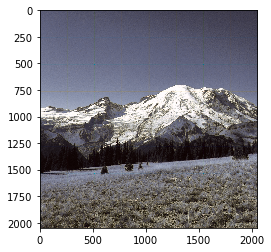

In [0]:
#NEXT STEPS, MAKE A FUNCTION, DOWNLOAD MODEL, SERVE

import math

# load the l component of an image (LAB colorspace)
def load_lab_bw(path, size):
  image = img_to_array(load_img(path, target_size=size)) / 255
  lab_image = rgb2lab(image)
  lab_image = (lab_image + [0, 128, 128]) / [100, 255, 255] # normalize

  bw = lab_image[:,:,0]
  return bw


image = load_lab_bw("rainier_large.jpg", (2048, 2048))


# splice a square bw image of im_size^2 into square of split_size^2
def splice_square_image(bw_image, im_size, split_size):
  dim = im_size / split_size
  if dim != int(dim):
    raise Exception("Error, please use a square number for tiles")
  
  dim = int(dim)
  # size of chunk
  C = split_size
  
  bw_chunks = []
  
  for x in range(dim):
    for y in range(dim):
      bw_chunks.append(bw_image[x*C : x*C + C, y*C : y*C + C])


  bw_chunks = np.expand_dims(np.array(bw_chunks), 3)
  return bw_chunks



bw_chunks = splice_square_image(image, 2048, 256)

pred = model.predict(bw_chunks)



# reconstruct an image of im_size^2 split into split_size^2 chunks, 
# use bw image for l component of LAB and color as color predictions
def reconstruct_img(im_size, split_size, bw, color):
  # calculate sidelength
  dim = (im_size / split_size)
  if dim != int(dim):
    raise Exception("Error, please use a square number for tiles, used: {}".format(dim))
  
  dim = int(dim)
  j = 0
  C = split_size

  result = np.zeros((im_size, im_size, 3))

  for x in range(dim):
    for y in range(dim):
      out = np.zeros((split_size, split_size, 3))

      out[:,:,0] = bw[j][:,:,0]
      out[:,:,1:] = color[j]

      out = (out * [100, 255, 255]) - [0, 128, 128]
      out = lab2rgb(out)

      result[x*C: x*C + C, y*C: y*C + C,:] = out
      j += 1
      
  return result


result = reconstruct_img(2048, 256, bw_chunks, pred)
plt.imshow(result)